#### We have the min and max temperatures in a city In India for each months of the year. We would like to find a function to describe this and show it graphically, the dataset given below.
<br>
Task:
<br>
1. fitting it to the periodic function
<br>
2. plot the fit
<br>
Data
<br>
Max = 39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25
<br>
Min = 21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18

In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy
from scipy import optimize

In [2]:
Max = [39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25]
Min = [21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18]
df = pd.DataFrame(list(zip(Max, Min)), columns =['Max', 'Min'], index = range(1,13)) 

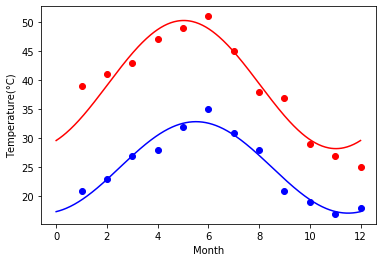

In [28]:
def yearly_temps(times, avg, ampl, time_offset):
    return (avg
            + ampl * np.cos((times + time_offset) * 2 * np.pi / times.max()))

res_max, cov_max = optimize.curve_fit(yearly_temps, df.index,
                                      Max, [30, 20, 40])
res_min, cov_min = optimize.curve_fit(yearly_temps, df.index,
                                      Min, [-50, 30, 20])


plt.cla()
days = np.linspace(0, 12, num=365)

plt.plot(df.index,Max, 'ro')
plt.plot(days, yearly_temps(days, *res_max), 'r-')
plt.plot(df.index,Min, 'bo')
plt.plot(days, yearly_temps(days, *res_min), 'b-')
plt.xlabel('Month')
plt.ylabel('Temperature(°C)')
plt.show()




#### This assignment is for visualization using matplotlib: 
<br>
data to use:
<br>
url=https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv
<br>
titanic = pd.read_csv(url)
<br>
Charts to plot:
<br>
1. Create a pie chart presenting the male/female proportion
<br>
2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

In [30]:
url="https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv"
titanic = pd.read_csv(url)

In [38]:
sex = [titanic['sex'].value_counts()[0],titanic['sex'].value_counts()[1]]

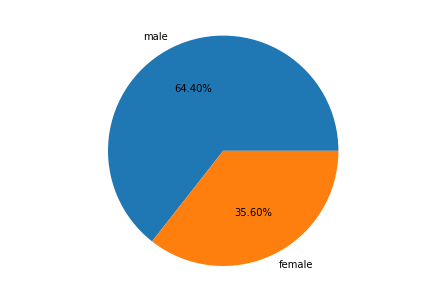

In [45]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
ax.pie(sex, labels = titanic['sex'].value_counts().index.tolist(),autopct='%1.2f%%')
plt.show()

In [137]:
titanic['Gender']=0
titanic.loc[titanic['sex']=="male", ['Gender']]=1

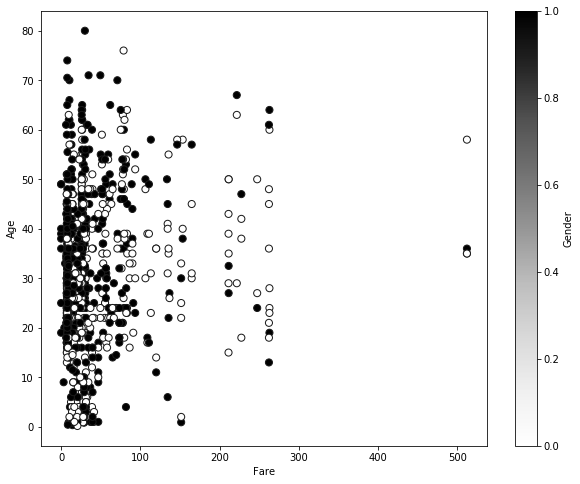

In [138]:
fig, ax = plt.subplots()
titanic.plot.scatter(x='fare', y='age', c = 'Gender', edgecolor='0.1', figsize=(10,8), s = 50, ax = ax)
ax.set_xlabel("Fare")
ax.set_ylabel("Age")
plt.show()